In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import scipy.stats as sis
import statsmodels.tsa.stattools as sta
import pandas as pd
import os
from scipy.signal import find_peaks

# **Datos señal ECG**

In [ ]:
ruta='/content/sample_data/signals.mat'
data=sio.loadmat(ruta)
print(data)
ECG=data['ECG_asRecording']
ECG_f=data['ECG_filtered']

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Mon Apr 20 15:20:29 2015', '__version__': '1.0', '__globals__': [], 'Fs': array([[1024]], dtype=uint16), 'ECG_asRecording': array([[3904.31689453, 3939.203125  , 3976.00683594, ..., 4366.41064453,
        4365.31103516, 4370.91796875]]), 'ECG_filtered': array([[ 8.87103896e-03,  5.62737497e+01,  8.57077127e+01, ...,
        -1.20952610e+02, -1.31734356e+02, -1.32898021e+02]]), 'EMG_filtered1': array([[ 17.65905117,  19.41391578,  18.89666666, ..., 242.49414224,
        220.4135886 , 151.5810508 ]]), 'EMG_filtered2': array([[  21.1780547 ,  -79.82418538, -133.65960989, ..., -384.58994036,
        -539.9349533 , -772.65519631]]), 'EMG_asRecording1': array([[ 908.07531738,  903.17706299,  896.62982178, ..., 1433.91882324,
        1416.109375  , 1352.75012207]]), 'EMG_asRecording2': array([[-3109.97558594, -3231.01391602, -3302.34960938, ...,
        -3791.24267578, -3924.6550293 , -4109.94433594]])}


# **Funcion RMS**

In [ ]:
from math import sqrt

def dato_RMS(signal):
  suma_RMS=0
  for i in range(len(signal)):
    suma_RMS=suma_RMS+(signal[i])**2
  RMS=sqrt(1/len(signal)*suma_RMS)
  return RMS


# **Vector Tiempo**

In [ ]:
#Vector tiempo señal sin filtrar
T=(1/1024);
ts= T*len(ECG[0]);
t=np.arange(0,ts,T)
print(t)
print(len(ECG[0]))
#Vector tiempo señal filtrada
ts_f= T*len(ECG_f[0]);
t_f=np.arange(0,ts_f,T)
print(t_f)
print(len(ECG_f[0]))

[0.00000000e+00 9.76562500e-04 1.95312500e-03 ... 2.99970703e+01
 2.99980469e+01 2.99990234e+01]
30720
[0.00000000e+00 9.76562500e-04 1.95312500e-03 ... 2.99970703e+01
 2.99980469e+01 2.99990234e+01]
30720


# **Graficas**

Text(0.5, 0, 'Tiempo')

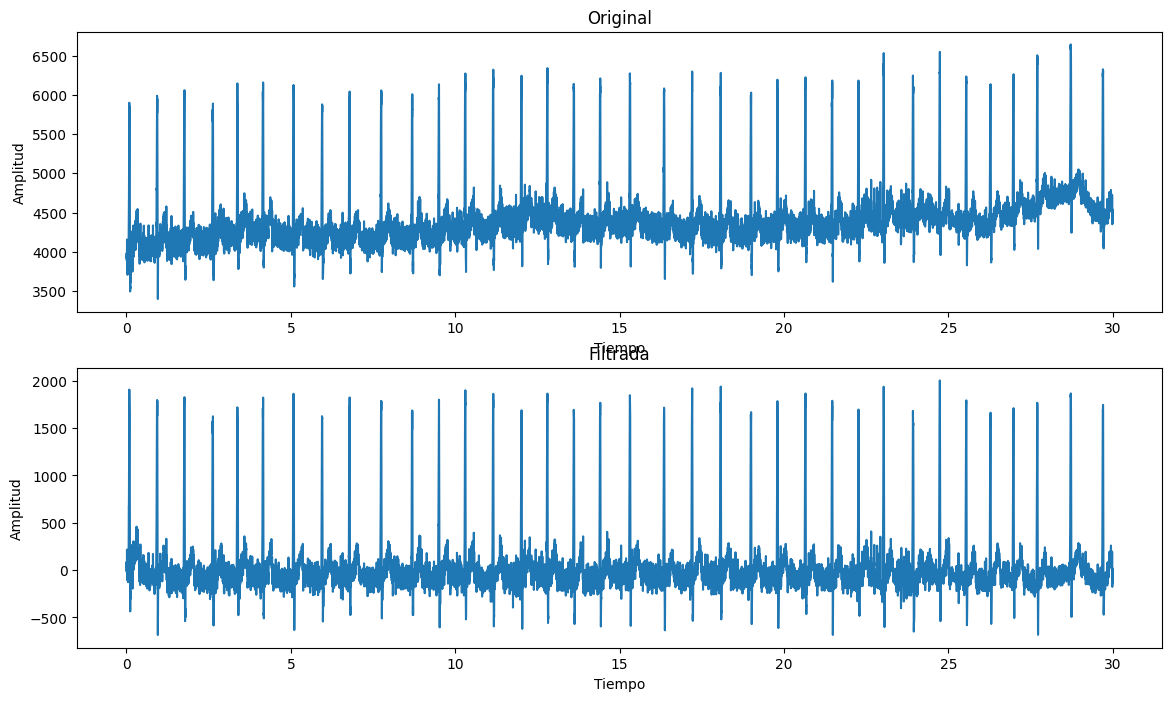

In [ ]:
signal_ECG=(ECG[0])
signal_ECG_f=(ECG_f[0])
plt.figure(figsize=(14, 8))
plt.subplot(2,1,1)
plt.plot(t,signal_ECG,label='Original')
plt.title('Original')
plt.ylabel('Amplitud')
plt.xlabel('Tiempo')
plt.subplot(2,1,2)
plt.plot(t_f,signal_ECG_f,label='Filtrada')
plt.title('Filtrada')
plt.ylabel('Amplitud')
plt.xlabel('Tiempo')

#**Análisis**
La frecuencia de interes para el ECG es de 0-50Hz

Se observa que la amplitud de la señal cambió, ya que, tras el filtrado, disminuyó de aproximadamente etre 3000 a 2500. Además, la señal se desplazó en el eje vertical hacia valores negativos, alcanzando -500 es decir, la señal se situó en el 0 del eje de la amplitud.. También se nota una reducción en la superposición de los datos, ya que en la señal filtrada hay menos datos superpuestos entre sí.

En la señal filtrada se visualiza una disminución en la superposicion de datos, lo que nos puede indicar que se eliminaron las altas frecuencias, ya que en un intervalo pequeño de tiempo no hay tantas oscilaciones como en el de la señal no filtrada. Por lo tanto, podemos intuir que el filtro utilizado es un pasa bajas o un pasa banda, tomando de referencia la frecuencia de 0-50Hz y que siempre debemos eliminar la frecuencia de 60Hz .


# **Selección de un solo ciclo**
Promedio, el valor RMS, la varianza y la desviación estándar del ciclo, para la señal filtrada y la señal sin filtrar

In [ ]:
#Extracción de los picos R de la señal filtrada y sin filtrar para la separación de los ciclos
picos_R,_ =find_peaks(signal_ECG,height=0,distance=500)

picos_R_f,_ =find_peaks(signal_ECG_f,height=0,distance=500)


             Señal     Promedio          RMS      Varianza  \
0  ECG sin filtrar  4117.312063  4127.435848  83468.053836   
1     ECG filtrado    86.549114   319.105902  94337.827499   

   Desviación estándar  
0           288.908383  
1           307.144636  


Text(0.5, 0, 'Tiempo')

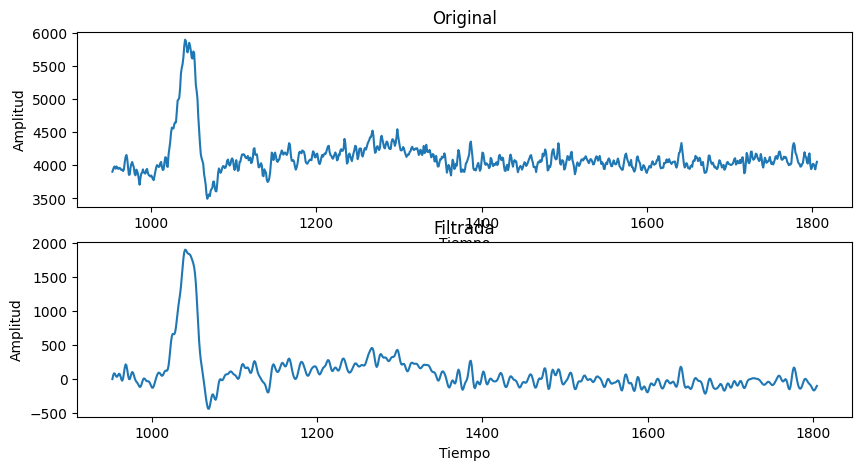

In [ ]:
#Corte de las señales
t_cortado=np.arange(picos_R[1],picos_R[2]);
señal_cortada = signal_ECG[0:len(t_cortado)];
t_F_cortado=np.arange(picos_R_f[1],picos_R_f[2]);
señal_F_cortada = signal_ECG_f[0:len(t_F_cortado)];

#Promedio
Promedio_ECG = np.mean(señal_cortada);
Promedio_ECG_f = np.mean(señal_F_cortada);

#RMS
RMS=dato_RMS(señal_cortada);
RMS_F=dato_RMS(señal_F_cortada);

#Varianza
Varianza_ECG=np.var(señal_cortada);
Varianza_ECG_f=np.var(señal_F_cortada);

#Desviación estándar
Desviacion=np.std(señal_cortada)
Desviacion_f=np.std(señal_F_cortada)

#DATAFRAME
datos = {
    'Señal': ['ECG sin filtrar', 'ECG filtrado'],
    'Promedio': [Promedio_ECG, Promedio_ECG_f],
    'RMS': [RMS, RMS_F],
    'Varianza': [Varianza_ECG, Varianza_ECG_f],
    'Desviación estándar': [Desviacion, Desviacion_f]
}

df = pd.DataFrame(datos)
print(df)

#Grafica
plt.figure(figsize=(10, 5))
plt.subplot(2,1,1)
plt.plot(t_cortado,señal_cortada)
plt.title('Original')
plt.ylabel('Amplitud')
plt.xlabel('Tiempo')
plt.subplot(2,1,2)
plt.plot(t_F_cortado,señal_F_cortada)
plt.title('Filtrada')
plt.ylabel('Amplitud')
plt.xlabel('Tiempo')

# **Analisis**

Se evidencia la disminución de fluctuaciones de la señal filtrada en comparación con la señal original. Además, la señal filtrada se desplazó verticalmente hacia el cero. Todos estos cambios nos permiten una mejor interpretación del complejo QRS, el cual estamos tomando de referencia para esta práctica.



* **Promedio:** Este valor cambia drásticamente entre la señal filtrada y la señal original debido al *offset* presente en la señal original y una evidente disminución de fluctuaciones en la señal, causando que la señal filtrada tenga un promedio más pequeño que el de la señal original.
*   **Varianza:** La varianza mide la dispersión de los datos en relación con su promedio. Indica qué tan dispersos están los valores de la señal en torno a su media. Podemos observar que la varianza aumentó en la señal filtrada, esto se debe a que, al eliminar las fluctuaciones con el filtro, las fluctuaciones presentes en la señal se vuelven más evidentes.
*   **Desviación estándar:** Mide la dispersión promedio de los valores de la señal respecto a su promedio. Este valor ha aumentado después del filtrado. Esto significa que, aunque el valor promedio de la señal ha disminuido, las variaciones de los valores individuales en torno a este nuevo promedio han aumentado. Esto puede indicar que las oscilaciones restantes en la señal filtrada tienen más dispersión relativa en comparación con la señal original.





# **15 ciclos de la señal filtrada**
Valor promedio y la varianza

    Ciclo    Promedio       Varianza
0       0   84.266952   93697.615521
1       1   86.549114   94337.827499
2       2   78.118955   92796.036614
3       3  102.258989  103048.615096
4       4   94.784907   98904.468445
5       5   78.062787   93668.024807
6       6   77.504389   92754.902239
7       7   85.099600   93981.427573
8       8  102.006958  142758.784441
9       9  109.372667  138901.500369
10     10   91.208217   95912.919616
11     11   92.031121   97007.387216
12     12   83.208655   93215.048666
13     13   80.006586   93068.022577
14     14   94.177337   98357.960373
15     15   92.613982   97104.796606


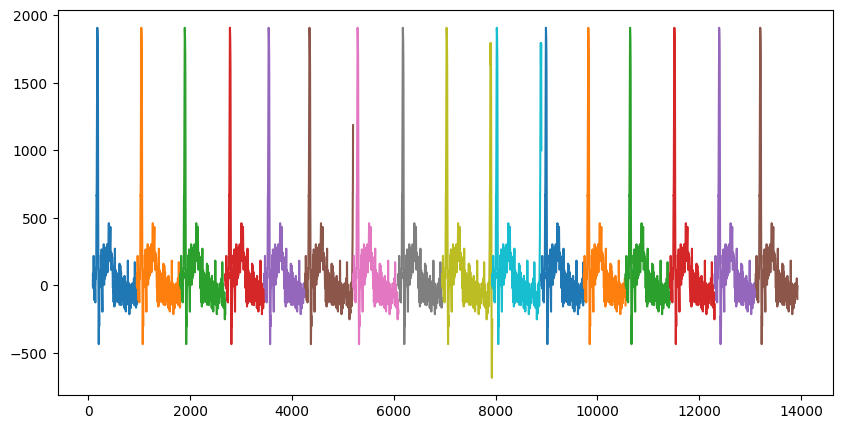

In [ ]:
Datos=[]
plt.figure(figsize=(10, 5))
for i in range(16):
  t_f_cut=np.arange(picos_R_f[i],picos_R_f[i+1])
  señal_f_cut = signal_ECG_f[0:len(t_f_cut)]
  Promedio_señal_f_cut=(np.mean(señal_f_cut))
  Varianza__señal_f_cut=(np.var(señal_f_cut))
  plt.plot(t_f_cut,señal_f_cut)
  Datos2={'Ciclo':i,'Promedio':Promedio_señal_f_cut,'Varianza':Varianza__señal_f_cut}
  Datos.append(Datos2)

ciclos= pd.DataFrame(Datos)
print(ciclos)

# **Análisis**

En la gráfica se observan que los picos de la señales tanto negativos como positivos difieren entre algunos de los ciclos, esto nos da una idea de que el promedio de cada ciclo será diferente y esto se confirma al hacer el cálculo. De igual manera, el valor de varianza varía en todos los ciclos, por tanto, no es posible afirmar que la señal es estacionaria por la variabilidad del valor de probabilidad.

Realice dos veces comparaciones entre dos ciclos cualquiera utilizando una prueba t. Determine
estadísticamente si existe diferencia estadística entre los ciclos, Compruebe los supuestos necesarios
para realizar una prueba t, esto es: Normalidad de la variable, independencia (se asume que los grupos
son independientes), y homocedasticidad (use una prueba de Levene), finalmente realice la prueba t
Análisis estadístico de señales Bioseñales y sistemas
para determinar si existen diferencias entre los ciclos. Qué indica este análisis respecto de la
estacionariedad, explique. De no cumplirse los requisitos, realice entonces un análisis no paramétrico
(prueba U de Mann-Whitney).

# **Comparación 1**

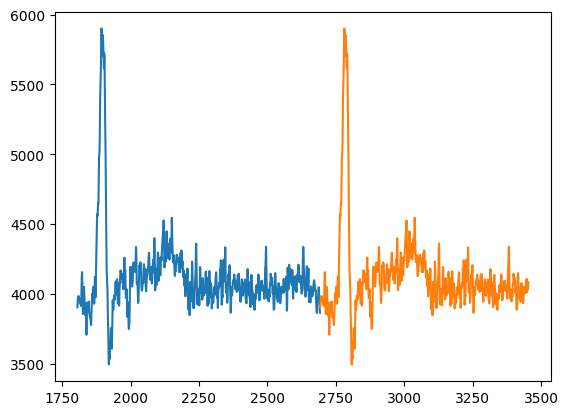

In [ ]:
#Selección de los dos ciclos
t_ciclo1=np.arange(picos_R_f[2],picos_R_f[3]);
señal_ciclo1 = signal_ECG[0:len(t_ciclo1)];
t_ciclo2=np.arange(picos_R_f[3],picos_R_f[4]);
señal_ciclo2 = signal_ECG[0:len(t_ciclo2)];
plt.plot(t_ciclo1,señal_ciclo1)
plt.plot(t_ciclo2,señal_ciclo2)

In [ ]:
#Supuesto de normalidad
_ , p_valor_normalidad1 = sis.shapiro(señal_ciclo1)
_ , p_valor_normalidad2 = sis.shapiro(señal_ciclo2)
print(f"Valor p de normalidad para el ciclo 1: {p_valor_normalidad1}")
print(f"Valor p de normalidad para el ciclo 2: {p_valor_normalidad2}")

Valor p de normalidad para el ciclo 1: 2.9183650068267272e-40
Valor p de normalidad para el ciclo 2: 2.6738400826096695e-37


H0= los datos provienen de una distribución normal

H1= los datos no provienen de una distribución normal

Si valor p<0.05 rechazo H0

Los valores p para ambos ciclos son inferiores a 0.05 por lo que no se cumple con el supuesto de normalidad

In [ ]:
#Supuesto de homocedasticidad
_, p_valor_homocedasticidad = sis.levene(señal_ciclo1, señal_ciclo2)
print(f"Valor p de homocedasticidad: {p_valor_homocedasticidad}")


Valor p de homocedasticidad: 0.3149373280744417


H0= hay homocedasticidad entre los dos ciclos

H1= hay heterocedasticidad entre los dos ciclos

Como el valor p de homocedasticidad es mayor a 0.05, se cumple la H0 y por tanto hay homocedasticidad entre los dos ciclos

In [ ]:
#Supuesto de independencia
chi2_stat, p_valor_independencia, dof, expected =sis.chi2_contingency(señal_ciclo1,señal_ciclo2)
print(p_valor_independencia)

1.0


H0= Las dos variables son independientes

H1= Las dos variables no son independientes

Como el valor p de independencia es mayor a 0.05, no se puede rechazar H0, es decir, los datos de los dos ciclos son independientes

Debido a que no se cumple con el supuesto de normalidad, no se puede realizar la prueba t, pero como se cumple el supuesto de homocedasticidad e independencia, se puede realizar la prueba U de Mann-Whitney

In [ ]:
#U de Mann-Whitney
_,p_valor_U = sis.mannwhitneyu(señal_ciclo1, señal_ciclo2)
print(f"Valor p de U de Mann-Whitney: {p_valor_U}")

Valor p de U de Mann-Whitney: MannwhitneyuResult(statistic=334761.0, pvalue=0.7758707853368046)


H0= los datos de los dos ciclos provienen de la misma población.

H1= los datos de los dos ciclos no provienen de la misma población.

Como el valor p obtenido en la prueba de Mann-Whitney es mayor a 0.05 y por tanto no se rechaza H0, es decir, los datos provienen de la misma población.

# **Comparación 2**

In [ ]:
#Selección de los dos ciclos
t_ciclo1_2=np.arange(picos_R[10],picos_R[11]);
señal_ciclo1_2 = signal_ECG[0:len(t_ciclo1_2)];
t_ciclo2_2=np.arange(picos_R[12],picos_R[13]);
señal_ciclo2_2 = signal_ECG[0:len(t_ciclo2_2)];

In [ ]:
#Supuesto de normalidad
_ , p_valor_normalidad1_2 = sis.shapiro(señal_ciclo1_2)
_ , p_valor_normalidad2_2 = sis.shapiro(señal_ciclo2_2)
print(f"Valor p de normalidad para el ciclo 1: {p_valor_normalidad1_2}")
print(f"Valor p de normalidad para el ciclo 2: {p_valor_normalidad2_2}")

Valor p de normalidad para el ciclo 1: 5.898370836303917e-39
Valor p de normalidad para el ciclo 2: 6.432034355533e-40


In [ ]:
#Supuesto de homocedasticidad
_, p_valor_homocedasticidad_2 = sis.levene(señal_ciclo1_2, señal_ciclo2_2)
print(f"Valor p de homocedasticidad: {p_valor_homocedasticidad_2}")


Valor p de homocedasticidad: 0.7400413182586558


In [ ]:
#Supuesto de independencia
chi2_stat, p_valor_independencia_2, dof, expected =sis.chi2_contingency(señal_ciclo1_2,señal_ciclo2_2)
print(p_valor_independencia_2)

1.0


In [ ]:
#U de Mann-Whitney
_, p_valor_U_2 = sis.mannwhitneyu(señal_ciclo1_2, señal_ciclo2_2)
print(f"Valor p de U de Mann-Whitney: {p_valor_U_2}")

Valor p de U de Mann-Whitney: 0.7677788573094515


#Analisis
Al realizar las dos comparaciones entre ciclos

Compruebe los resultados anteriores aplicando una prueba de Dickey-Fuller a la señal
(Estacionariedad)

In [ ]:
#Prueba de Dickey-Fuller
p_valor_Dickey_Fuller1 = sta.adfuller(señal_ciclo1)
print(f"Valor p de Dickey-Fuller para el ciclo 1: {p_valor_Dickey_Fuller1[1]}")
p_valor_Dickey_Fuller2 = sta.adfuller(señal_ciclo2)
print(f"Valor p de Dickey-Fuller para el ciclo 2: {p_valor_Dickey_Fuller2[1]}")

Valor p de Dickey-Fuller para el ciclo 1: 3.8207307543133905e-07
Valor p de Dickey-Fuller para el ciclo 2: 2.34049726222248e-06


H0: el proceso no es estacionario

H1: el proceso es estacionario

Como los valores arrojados por la prueba de Dickey-Fuller son menores a 0.05, se rechaza H0, por tanto, el proceso es estacionario.

Se dice que un proceso es estacionario si la media y la varianza son independientes de tiempo pero es posible que estos parámetros estadísticos de los datos analizados varíen debido a la variabilidad del muestreo más no a su tamaño o a su posición dentro de la población.
